In [1]:
import sys, os
import datetime as dt

# Add KF_scripts to sys.path
KF_SCRIPTS_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
if KF_SCRIPTS_DIR not in sys.path:
    sys.path.append(KF_SCRIPTS_DIR)

print("Added to sys.path:", KF_SCRIPTS_DIR)

# === 1. Imports ===
import pandas as pd
import numpy as np
import plotly.graph_objects as go


Added to sys.path: C:\Users\User\OneDrive\Projects\TradingSystem\KF_TradingSystem


**Load processed data and execute entry and exit**

In [4]:
from src.quant.backtesting import one_day_backtest


# 1. Run simulation
df_day, df_trades, summary = one_day_backtest(
    "QQQ",
    2025, 11, 21,
    Q_high=0.9,
    window_max=50,
    cooldown=23,
    slope_smooth=True,
    # slope_smooth=False, 
    slope_smooth_window=5,
    slope_peak_half_window=2,
    slope_peak_hysteresis=0.0001,   # try small values like 0.0002–0.001
    # slope_peak_hysteresis=0.0,   # try small values like 0.0002–0.001
    slope_peak_min_swing=0.001,     # ← TRY VALUES 0.001–0.005
    # slope_peak_min_swing=0,     # ← TRY VALUES 0.001–0.005
    use_region_recent=False,   # NEW BEHAVIOR
    # use_region_recent=True,   # OLD BEHAVIOR
    peak_to_trough=0,   # ← ADD
)


# 3. Print summary
print(summary)
# df_trades


QQQ 2025-11-21: Trades=61, Total=-0.5100, Avg=-0.0084
{'symbol': 'QQQ', 'date': datetime.date(2025, 11, 21), 'total_pnl': np.float64(-0.5099999999996498), 'num_trades': 61, 'avg_pnl': np.float64(-0.008360655737699178)}


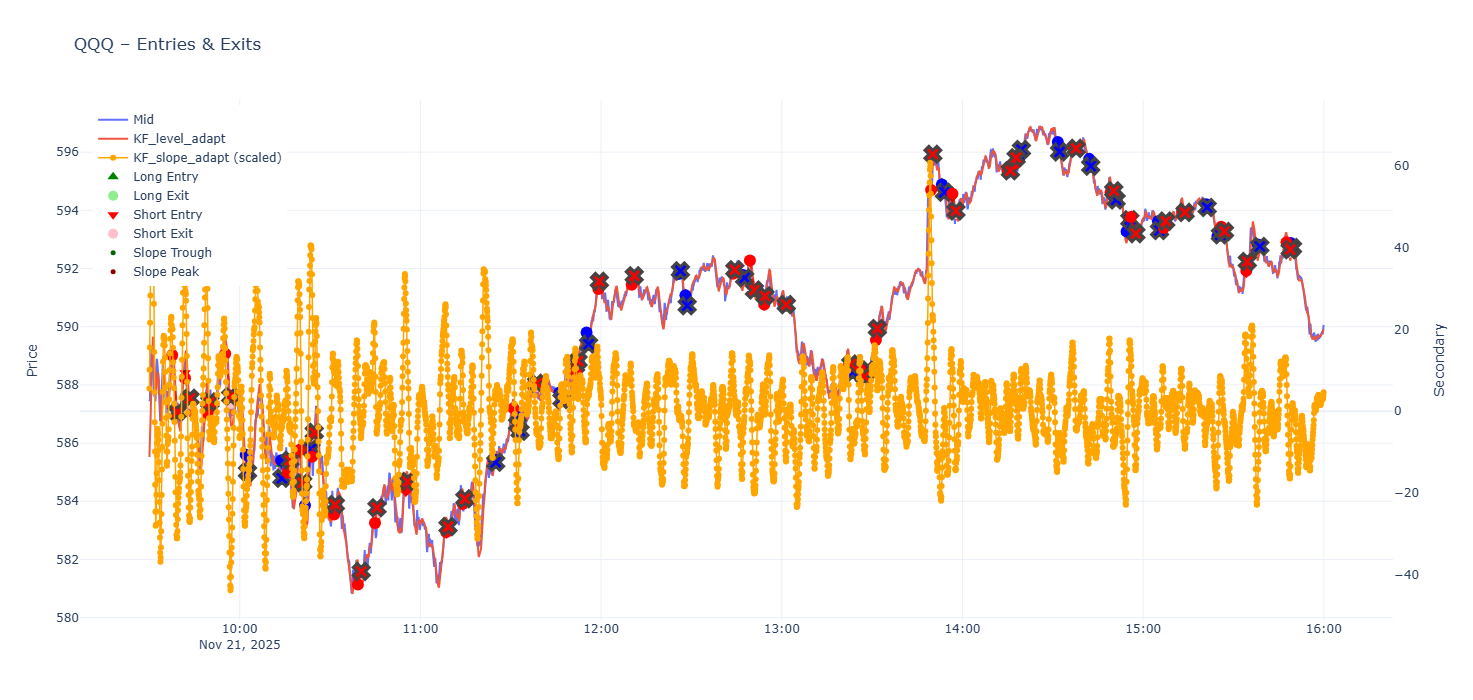

In [5]:
# 7 — now plot

# Plotting
from src.visualization.plot_utils import plot_price_signals
plot_price_signals(
    df_day,
    # trades=None,
    trades=df_trades,
    price_cols=("Mid", "KF_level_adapt"),
    secondary_cols=("KF_slope_adapt",),
    secondary_scale=1000,
    show_peaks=True,
    show_signals=True,
    show_real_trades=True,
    show_trade_lines=True,
    title="QQQ – Entries & Exits"
)



In [ ]:
# Quick sanity check
df_day[["entry_long", "exit_long", "entry_short", "exit_short"]].sum()

In [ ]:
t1="2025-11-21 09:34:40-05:00"
t = "2025-11-21 09:35:20-05:00"


df_day.loc[t1:t, [
    "KF_slope_adapt",
    "region_max",
     "region_min",
    "slope_q_roll_daily",
    "slope_peak_max",
    "slope_peak_min",
    "slope_peak_min_raw",
    "slope_peak_max_raw",
    "entry_short",
     "entry_long",
     "exit_long",
     "exit_short",
]]


In [ ]:
df_trades.columns

In [ ]:
# df_trades_sorted=df_trades.sort_index()
df_trades = df_trades.sort_values("entry_time").reset_index(drop=True)
df_trades.head

In [ ]:
t1 = "2025-11-21 09:37:00-05:00"
t2 = "2025-11-21 09:37:40-05:00"

# # df_day.loc[t, ["entry_short", "exit_short", "trade_id_short"]]
# df_trades[df_trades['entry_time'] == '09:37:20-05:00']
# df_trades[df_trades['entry_time'] == t]

# t1 = "2025-11-21 15:12:30-05:00"
# t2 = "2025-11-21 15:12:50-05:00"

mask = df_trades['entry_time'].between(t1, t2)
df_sel = df_trades.loc[mask]
df_sel




In [ ]:
df_trades.info()

In [ ]:
df_day.columns

In [ ]:
df_day.loc["2025-11-21 15:12:00":"2025-11-21 15:13:00", ["entry_short"]].sum()


In [ ]:
df_day[df_day["entry_short"] == True]


In [ ]:
from src.visualization.double_axis_plot import plot_dual_axis


plot_dual_axis(
    df_day,
    ['KF_slope_adapt'],['KF_curv_adapt'] )
    

In [ ]:
os.getcwd()

In [ ]:
import os

os.listdir("logs")


In [ ]:
df = df_day.copy()

df['KF_slope_smooth'] = (
    df['KF_slope_adapt']
        .astype(float)
        .rolling(window=5, min_periods=1)
        .mean()
)




In [ ]:
from src.visualization.double_axis_plot import plot_dual_axis

plot_dual_axis(df,['KF_slope_adapt','KF_slope_smooth'],[])